In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv('fraud_oracle.csv')
df.head(3)

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,...,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy
0,Dec,5,Wednesday,Honda,Urban,Tuesday,Jan,1,Female,Single,...,3 years,26 to 30,No,No,External,none,1 year,3 to 4,1994,Liability
1,Jan,3,Wednesday,Honda,Urban,Monday,Jan,4,Male,Single,...,6 years,31 to 35,Yes,No,External,none,no change,1 vehicle,1994,Collision
2,Oct,5,Friday,Honda,Urban,Thursday,Nov,2,Male,Married,...,7 years,41 to 50,No,No,External,none,no change,1 vehicle,1994,Collision


In [3]:
df.shape

(15420, 33)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15420 entries, 0 to 15419
Data columns (total 33 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Month                 15420 non-null  object
 1   WeekOfMonth           15420 non-null  int64 
 2   DayOfWeek             15420 non-null  object
 3   Make                  15420 non-null  object
 4   AccidentArea          15420 non-null  object
 5   DayOfWeekClaimed      15420 non-null  object
 6   MonthClaimed          15420 non-null  object
 7   WeekOfMonthClaimed    15420 non-null  int64 
 8   Sex                   15420 non-null  object
 9   MaritalStatus         15420 non-null  object
 10  Age                   15420 non-null  int64 
 11  Fault                 15420 non-null  object
 12  PolicyType            15420 non-null  object
 13  VehicleCategory       15420 non-null  object
 14  VehiclePrice          15420 non-null  object
 15  FraudFound_P          15420 non-null

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
WeekOfMonth,15420.0,2.788586,1.287585,1.0,2.00,3.0,4.00,5.0
WeekOfMonthClaimed,15420.0,2.693969,1.259115,1.0,2.00,3.0,4.00,5.0
Age,15420.0,39.855707,13.492377,0.0,31.00,38.0,48.00,80.0
FraudFound_P,15420.0,0.059857,0.237230,0.0,0.00,0.0,0.00,1.0
PolicyNumber,15420.0,7710.500000,4451.514911,1.0,3855.75,7710.5,11565.25,15420.0
RepNumber,15420.0,8.483268,4.599948,1.0,5.00,8.0,12.00,16.0
Deductible,15420.0,407.704280,43.950998,300.0,400.00,400.0,400.00,700.0
DriverRating,15420.0,2.487808,1.119453,1.0,1.00,2.0,3.00,4.0
Year,15420.0,1994.866472,0.803313,1994.0,1994.00,1995.0,1996.00,1996.0


In [6]:
df.isna().sum()

Month                   0
WeekOfMonth             0
DayOfWeek               0
Make                    0
AccidentArea            0
DayOfWeekClaimed        0
MonthClaimed            0
WeekOfMonthClaimed      0
Sex                     0
MaritalStatus           0
Age                     0
Fault                   0
PolicyType              0
VehicleCategory         0
VehiclePrice            0
FraudFound_P            0
PolicyNumber            0
RepNumber               0
Deductible              0
DriverRating            0
Days_Policy_Accident    0
Days_Policy_Claim       0
PastNumberOfClaims      0
AgeOfVehicle            0
AgeOfPolicyHolder       0
PoliceReportFiled       0
WitnessPresent          0
AgentType               0
NumberOfSuppliments     0
AddressChange_Claim     0
NumberOfCars            0
Year                    0
BasePolicy              0
dtype: int64

In [7]:
df.nunique()

Month                      12
WeekOfMonth                 5
DayOfWeek                   7
Make                       19
AccidentArea                2
DayOfWeekClaimed            8
MonthClaimed               13
WeekOfMonthClaimed          5
Sex                         2
MaritalStatus               4
Age                        66
Fault                       2
PolicyType                  9
VehicleCategory             3
VehiclePrice                6
FraudFound_P                2
PolicyNumber            15420
RepNumber                  16
Deductible                  4
DriverRating                4
Days_Policy_Accident        5
Days_Policy_Claim           4
PastNumberOfClaims          4
AgeOfVehicle                8
AgeOfPolicyHolder           9
PoliceReportFiled           2
WitnessPresent              2
AgentType                   2
NumberOfSuppliments         4
AddressChange_Claim         5
NumberOfCars                5
Year                        3
BasePolicy                  3
dtype: int

In [8]:
df[df.duplicated()]

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,...,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy


it seems like we can drop the policy number column since it works pretty much like an index but we'll do that right before developing our model

## EDA

In [9]:
df.columns

Index(['Month', 'WeekOfMonth', 'DayOfWeek', 'Make', 'AccidentArea',
       'DayOfWeekClaimed', 'MonthClaimed', 'WeekOfMonthClaimed', 'Sex',
       'MaritalStatus', 'Age', 'Fault', 'PolicyType', 'VehicleCategory',
       'VehiclePrice', 'FraudFound_P', 'PolicyNumber', 'RepNumber',
       'Deductible', 'DriverRating', 'Days_Policy_Accident',
       'Days_Policy_Claim', 'PastNumberOfClaims', 'AgeOfVehicle',
       'AgeOfPolicyHolder', 'PoliceReportFiled', 'WitnessPresent', 'AgentType',
       'NumberOfSuppliments', 'AddressChange_Claim', 'NumberOfCars', 'Year',
       'BasePolicy'],
      dtype='object')

In [10]:
time_related_cols = ['Month', 'WeekOfMonth', 'DayOfWeek','DayOfWeekClaimed', 'MonthClaimed','Year']

In [11]:
for col in time_related_cols:
    temp = df.groupby(col).count().sort_values('PolicyNumber',ascending=False)['PolicyNumber']
    print(temp)

Month
Jan    1411
May    1367
Mar    1360
Jun    1321
Oct    1305
Dec    1285
Apr    1280
Feb    1266
Jul    1257
Sep    1240
Nov    1201
Aug    1127
Name: PolicyNumber, dtype: int64
WeekOfMonth
3    3640
2    3558
4    3398
1    3187
5    1637
Name: PolicyNumber, dtype: int64
DayOfWeek
Monday       2616
Friday       2445
Tuesday      2300
Thursday     2173
Wednesday    2159
Saturday     1982
Sunday       1745
Name: PolicyNumber, dtype: int64
DayOfWeekClaimed
Monday       3757
Tuesday      3375
Wednesday    2951
Thursday     2660
Friday       2497
Saturday      127
Sunday         52
0               1
Name: PolicyNumber, dtype: int64
MonthClaimed
Jan    1446
May    1411
Mar    1348
Oct    1339
Jun    1293
Feb    1287
Nov    1285
Apr    1271
Sep    1242
Jul    1225
Dec    1146
Aug    1126
0         1
Name: PolicyNumber, dtype: int64
Year
1994    6142
1995    5195
1996    4083
Name: PolicyNumber, dtype: int64


In [12]:
for col in time_related_cols[0:-1]:
    temp = df.groupby([col,'Year']).count().sort_values(['Year','PolicyNumber'],ascending=[True,False])['PolicyNumber']
    print(temp)

Month  Year
Jan    1994    608
Mar    1994    584
May    1994    569
Jun    1994    543
Apr    1994    533
Feb    1994    528
Jul    1994    495
Dec    1994    471
Aug    1994    470
Nov    1994    453
Oct    1994    447
Sep    1994    441
Oct    1995    493
Mar    1995    486
Dec    1995    480
Jan    1995    479
Feb    1995    446
Nov    1995    441
Sep    1995    422
Apr    1995    409
Jun    1995    400
May    1995    400
Jul    1995    397
Aug    1995    342
May    1996    398
Jun    1996    378
Sep    1996    377
Jul    1996    365
Oct    1996    365
Apr    1996    338
Dec    1996    334
Jan    1996    324
Aug    1996    315
Nov    1996    307
Feb    1996    292
Mar    1996    290
Name: PolicyNumber, dtype: int64
WeekOfMonth  Year
3            1994    1448
2            1994    1387
4            1994    1369
1            1994    1281
5            1994     657
3            1995    1235
2            1995    1182
4            1995    1135
1            1995    1085
5            1995  

<Figure size 2000x500 with 0 Axes>

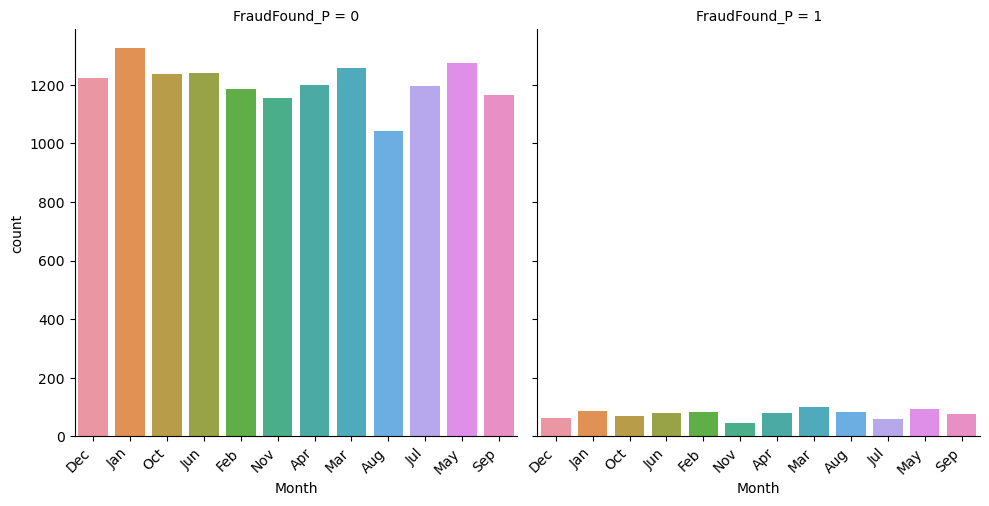

<Figure size 2000x500 with 0 Axes>

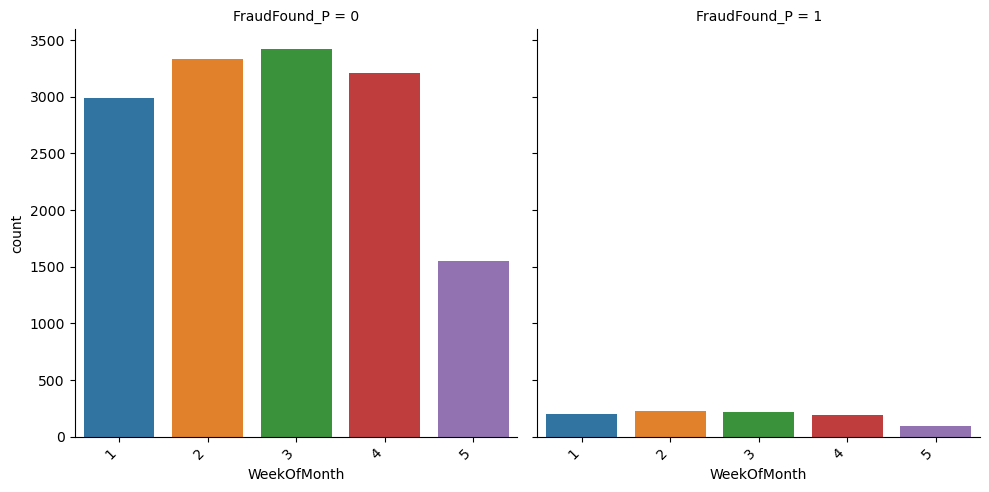

<Figure size 2000x500 with 0 Axes>

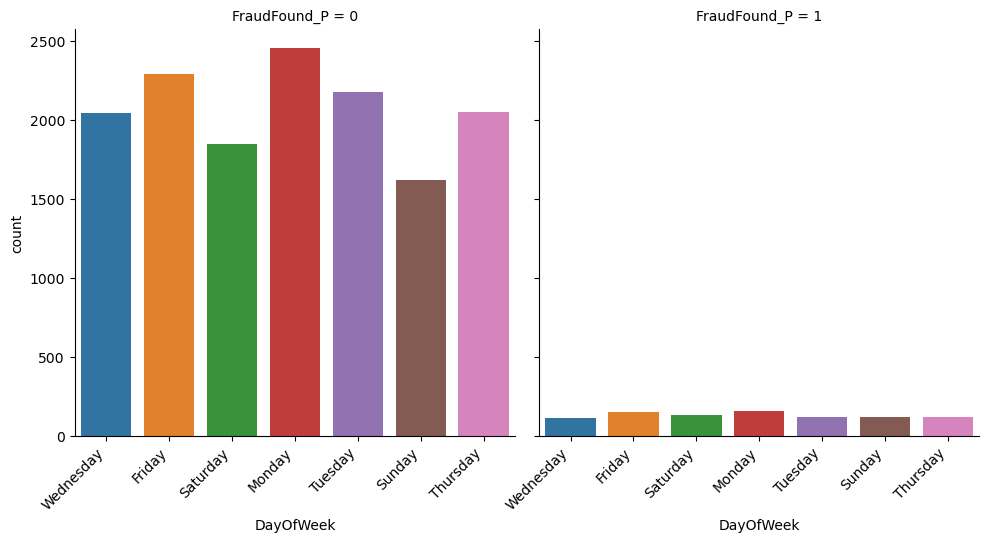

<Figure size 2000x500 with 0 Axes>

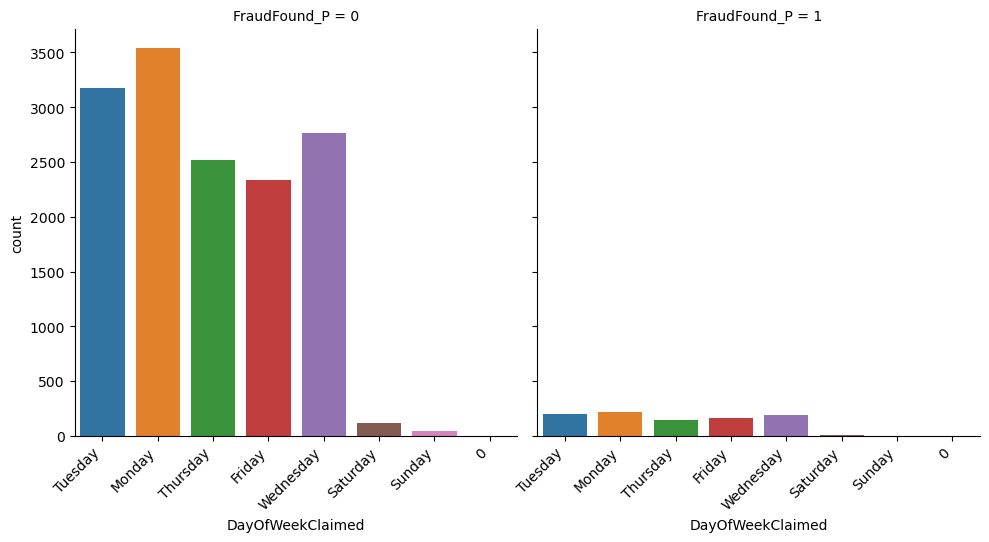

<Figure size 2000x500 with 0 Axes>

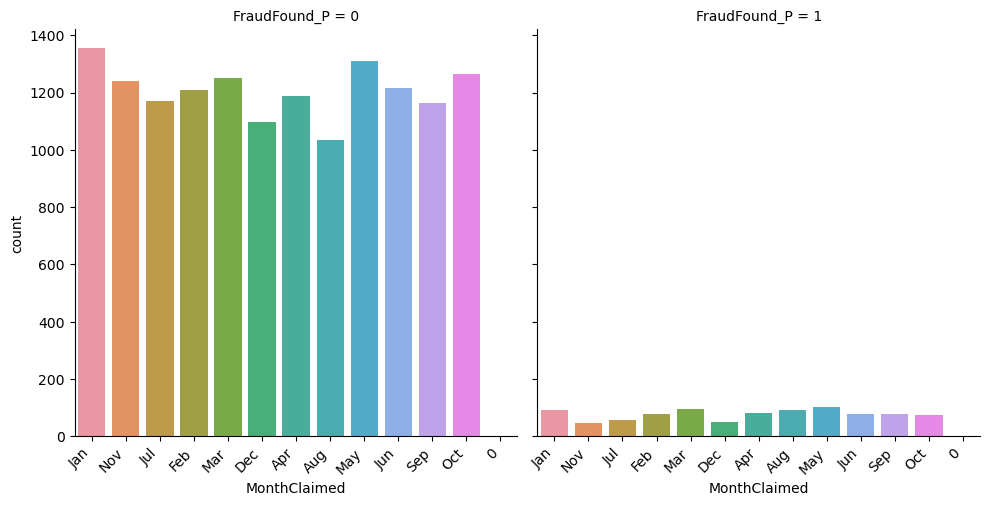

<Figure size 2000x500 with 0 Axes>

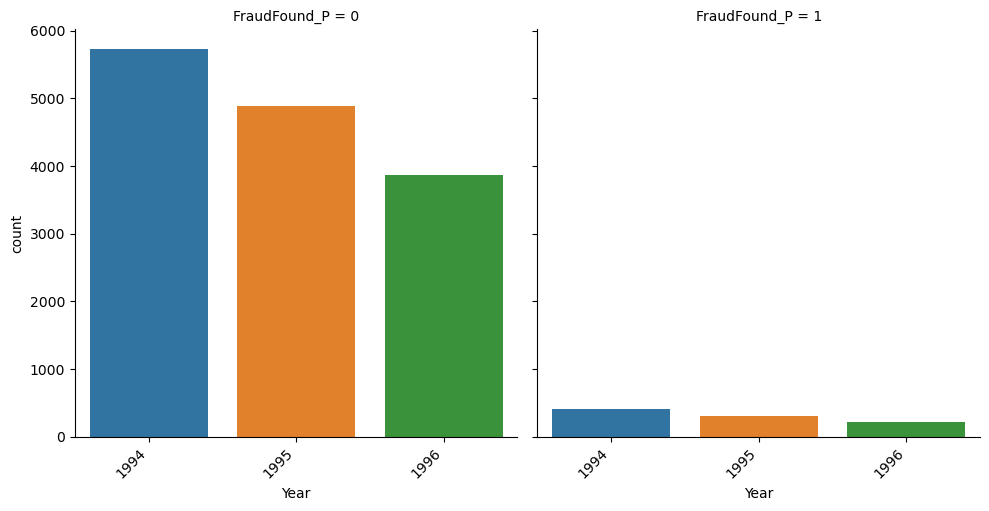

In [13]:
for col in time_related_cols:
    plt.figure(figsize=(20,5))
    g = sns.catplot(data=df,x=col,col='FraudFound_P',kind='count')
    g.set_xticklabels(rotation=45,horizontalalignment='right')

In [14]:
person_info_cols = ['Sex','MaritalStatus','Age','DriverRating']

In [15]:
for col in person_info_cols:
    print(df[col].unique())

['Female' 'Male']
['Single' 'Married' 'Widow' 'Divorced']
[21 34 47 65 27 20 36  0 30 42 71 52 28 61 38 41 32 40 63 31 45 60 39 55
 35 44 72 29 37 59 49 50 26 48 64 33 74 23 25 56 16 68 18 51 22 53 46 43
 57 54 69 67 19 78 77 75 80 58 73 24 76 62 79 70 17 66]
[1 4 3 2]


In [16]:
for col in person_info_cols:
    if col != 'Age':
        temp = df.groupby(col).count().sort_values('PolicyNumber',ascending=False)['PolicyNumber']
        print(temp)

Sex
Male      13000
Female     2420
Name: PolicyNumber, dtype: int64
MaritalStatus
Married     10625
Single       4684
Divorced       76
Widow          35
Name: PolicyNumber, dtype: int64
DriverRating
1    3944
3    3884
2    3801
4    3791
Name: PolicyNumber, dtype: int64


In [17]:
for col in person_info_cols:
    if col != 'Age':
        temp = df.groupby(['Year',col]).count().sort_values(['Year','PolicyNumber'],ascending=[True,False])['PolicyNumber']
        print(temp)

Year  Sex   
1994  Male      5188
      Female     954
1995  Male      4358
      Female     837
1996  Male      3454
      Female     629
Name: PolicyNumber, dtype: int64
Year  MaritalStatus
1994  Married          4189
      Single           1911
      Divorced           30
      Widow              12
1995  Married          3587
      Single           1575
      Divorced           22
      Widow              11
1996  Married          2849
      Single           1198
      Divorced           24
      Widow              12
Name: PolicyNumber, dtype: int64
Year  DriverRating
1994  3               1558
      1               1531
      2               1530
      4               1523
1995  1               1326
      4               1300
      3               1299
      2               1270
1996  1               1087
      3               1027
      2               1001
      4                968
Name: PolicyNumber, dtype: int64


<Figure size 2000x500 with 0 Axes>

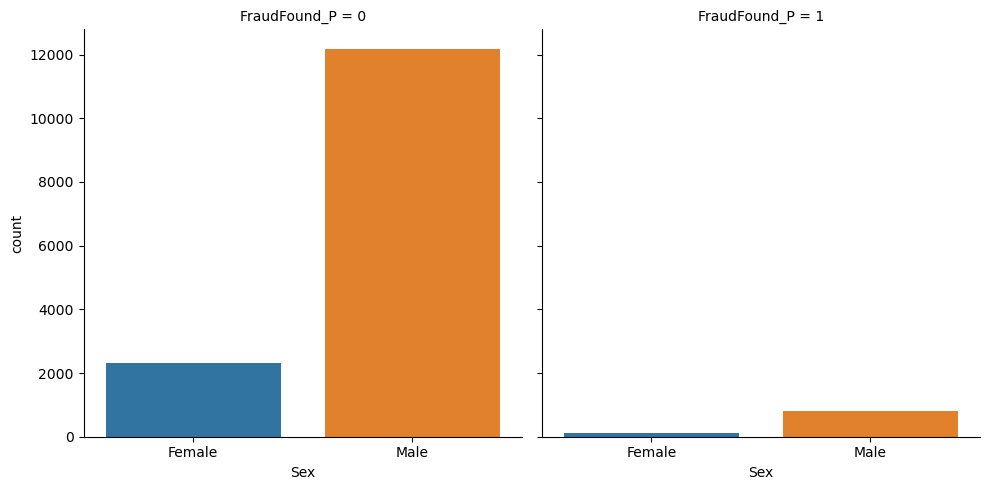

<Figure size 2000x500 with 0 Axes>

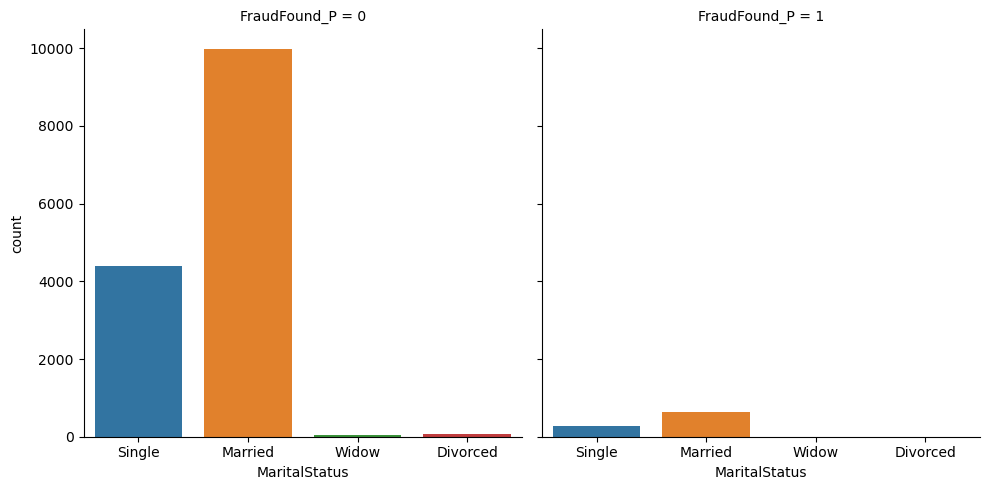

<Figure size 2000x500 with 0 Axes>

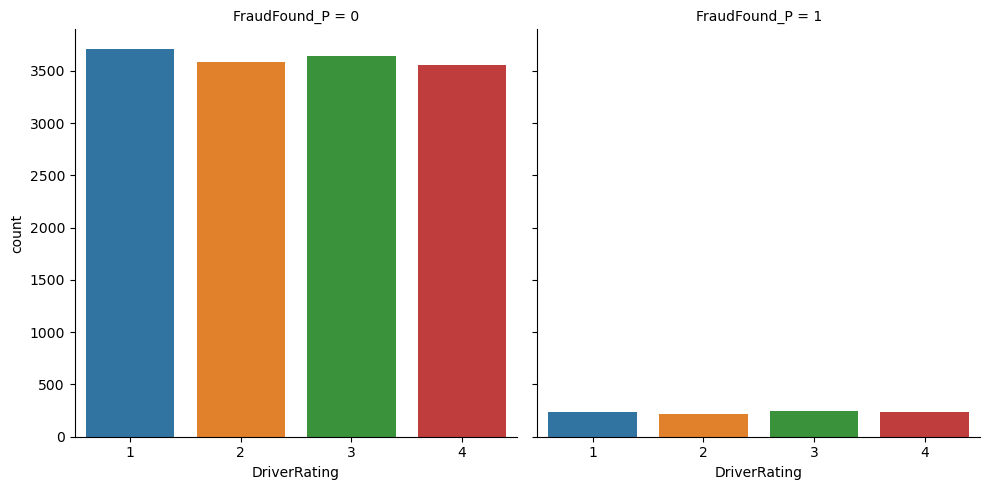

In [18]:
for col in person_info_cols:
    if col != 'Age':
        plt.figure(figsize=(20,5))
        sns.catplot(data=df,x=col,col='FraudFound_P',kind='count')

<Axes: ylabel='Age'>

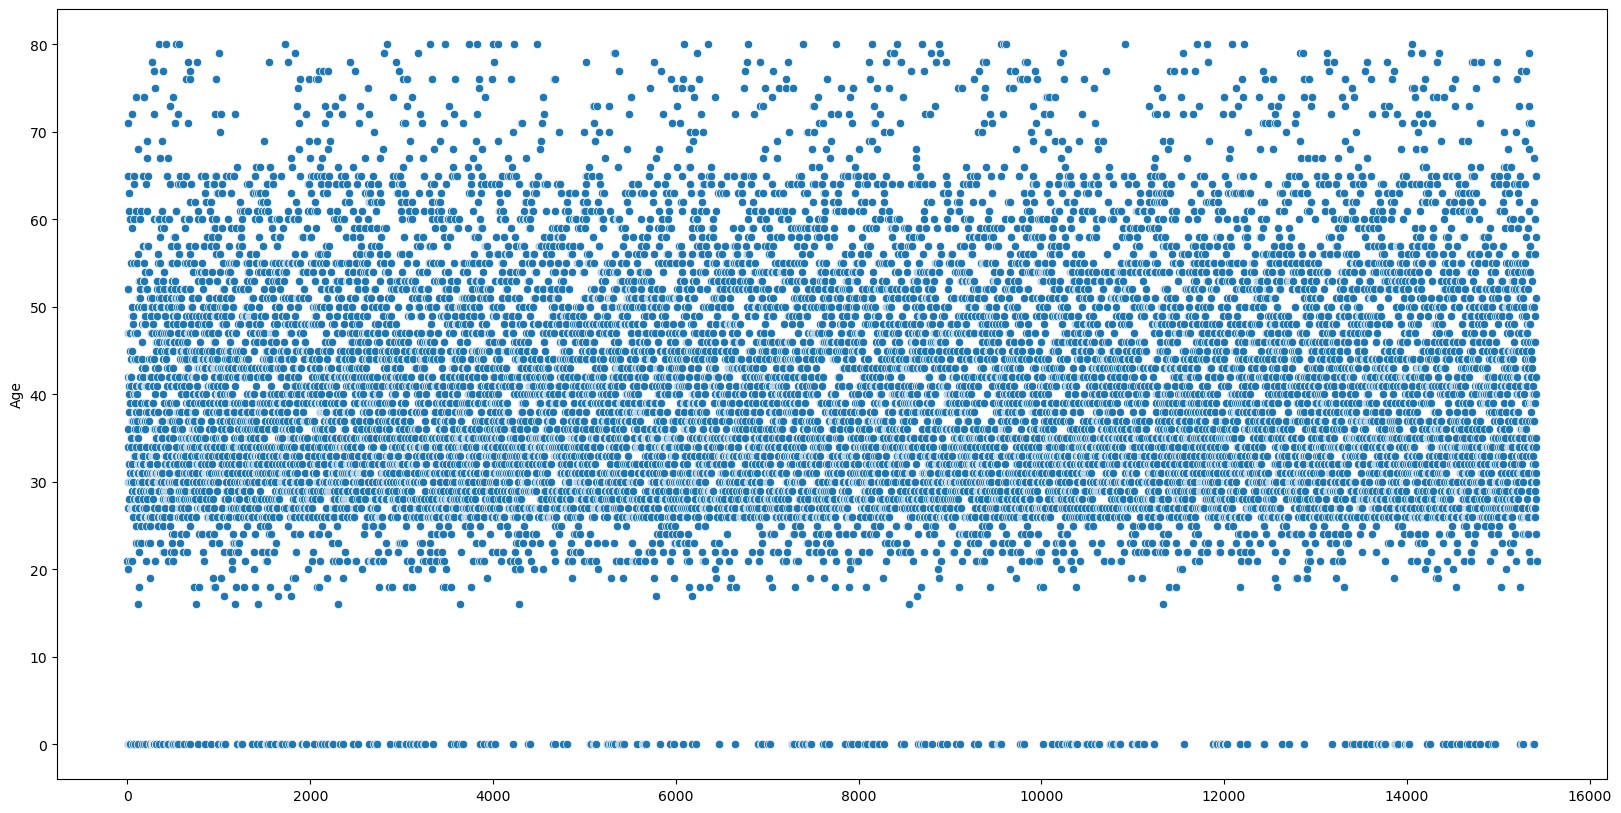

In [19]:
plt.figure(figsize=(20,10))
sns.scatterplot(df['Age'])

<Axes: xlabel='Age', ylabel='PolicyNumber'>

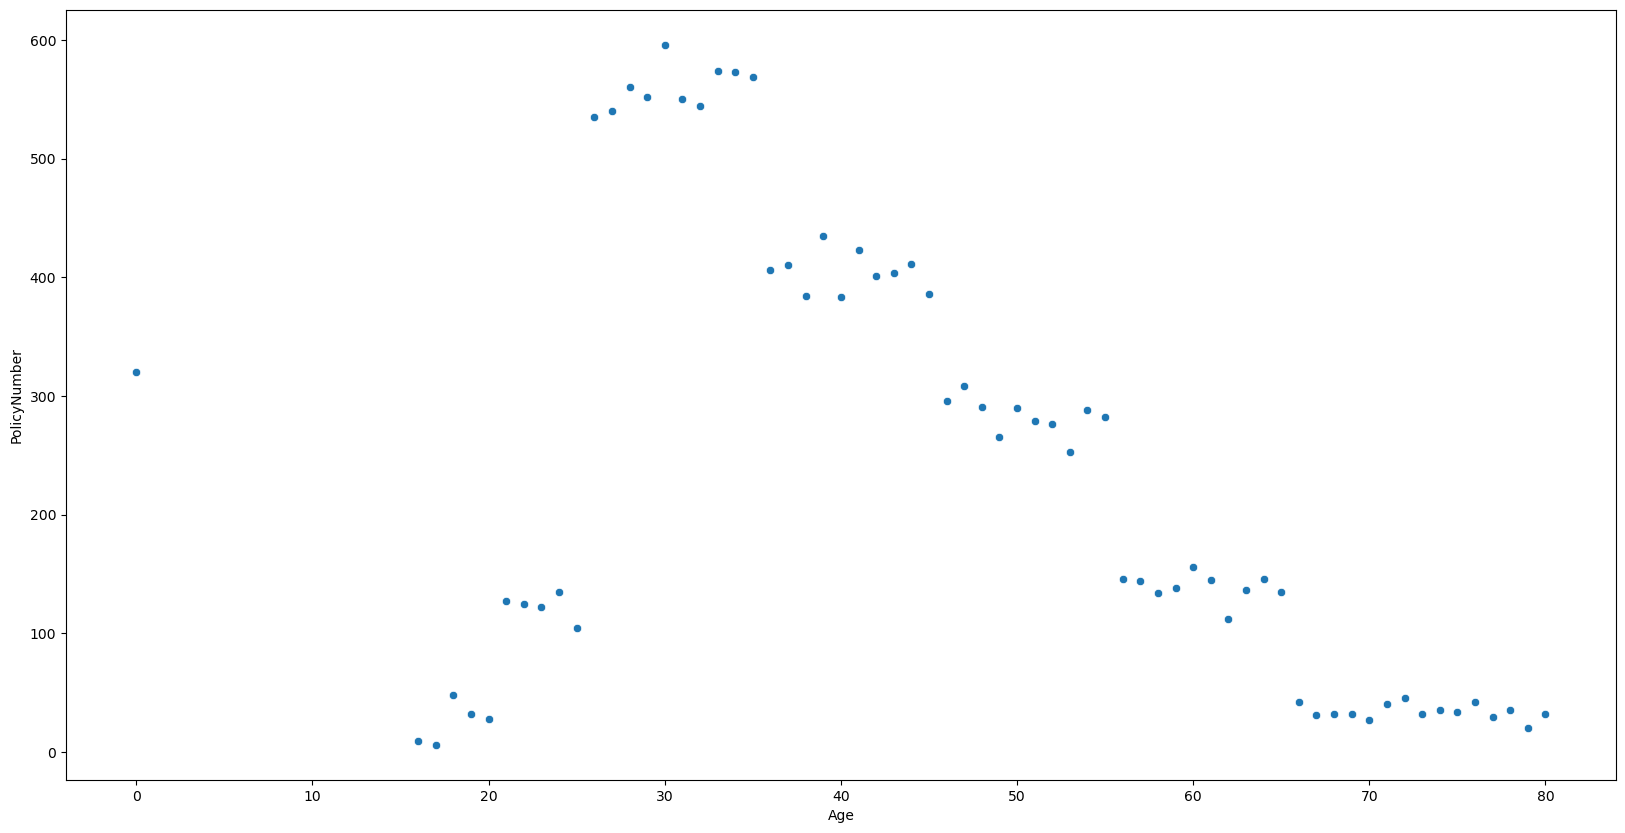

In [20]:
t = df.groupby('Age').count()
plt.figure(figsize=(20,10))
sns.scatterplot(data=t,x=t.index,y=t['PolicyNumber'])

In [21]:
car_factors_cols = ['Make','VehicleCategory','VehiclePrice','AgeOfVehicle']

In [22]:
for col in car_factors_cols:
    temp = df.groupby(col).count()['PolicyNumber'].sort_values(ascending=False)
    print(temp)

Make
Pontiac      3837
Toyota       3121
Honda        2801
Mazda        2354
Chevrolet    1681
Accura        472
Ford          450
VW            283
Dodge         109
Saab          108
Mercury        83
Saturn         58
Nisson         30
BMW            15
Jaguar          6
Porche          5
Mecedes         4
Ferrari         2
Lexus           1
Name: PolicyNumber, dtype: int64
VehicleCategory
Sedan      9671
Sport      5358
Utility     391
Name: PolicyNumber, dtype: int64
VehiclePrice
20000 to 29000     8079
30000 to 39000     3533
more than 69000    2164
less than 20000    1096
40000 to 59000      461
60000 to 69000       87
Name: PolicyNumber, dtype: int64
AgeOfVehicle
7 years        5807
more than 7    3981
6 years        3448
5 years        1357
new             373
4 years         229
3 years         152
2 years          73
Name: PolicyNumber, dtype: int64


In [23]:
policy_factors_cols = ['PolicyType','RepNumber','Deductible', 'DriverRating', 'PastNumberOfClaims','AgeOfPolicyHolder','BasePolicy','Days_Policy_Accident','Days_Policy_Claim',]
event_factors_cols = ['PoliceReportFiled', 'WitnessPresent', 'AgentType','NumberOfSuppliments', 'AddressChange_Claim', 'NumberOfCars']

In [24]:
for col in policy_factors_cols:
    t = df.groupby(col).count()['PolicyNumber'].sort_values(ascending=False)
    print(t)

PolicyType
Sedan - Collision       5584
Sedan - Liability       4987
Sedan - All Perils      4087
Sport - Collision        348
Utility - All Perils     340
Utility - Collision       30
Sport - All Perils        22
Utility - Liability       21
Sport - Liability          1
Name: PolicyNumber, dtype: int64
RepNumber
7     1069
9      999
1      987
5      987
10     986
12     977
15     977
16     967
2      956
3      949
11     948
6      942
14     941
8      931
4      912
13     892
Name: PolicyNumber, dtype: int64
Deductible
400    14838
700      311
500      263
300        8
Name: PolicyNumber, dtype: int64
DriverRating
1    3944
3    3884
2    3801
4    3791
Name: PolicyNumber, dtype: int64
PastNumberOfClaims
2 to 4         5485
none           4352
1              3573
more than 4    2010
Name: PolicyNumber, dtype: int64
AgeOfPolicyHolder
31 to 35    5593
36 to 40    4043
41 to 50    2828
51 to 65    1392
26 to 30     613
over 65      508
16 to 17     320
21 to 25     108
18 to 20

<Figure size 2000x1000 with 0 Axes>

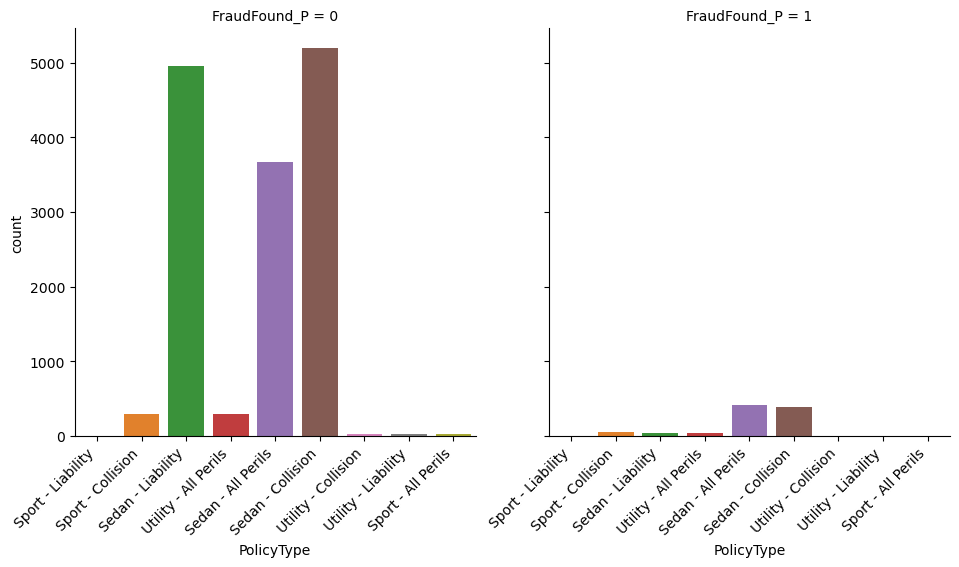

<Figure size 2000x1000 with 0 Axes>

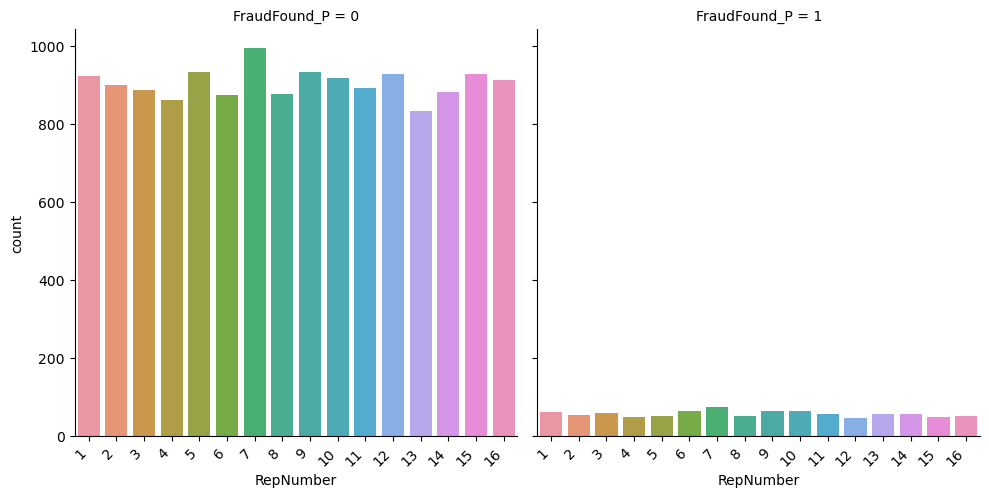

<Figure size 2000x1000 with 0 Axes>

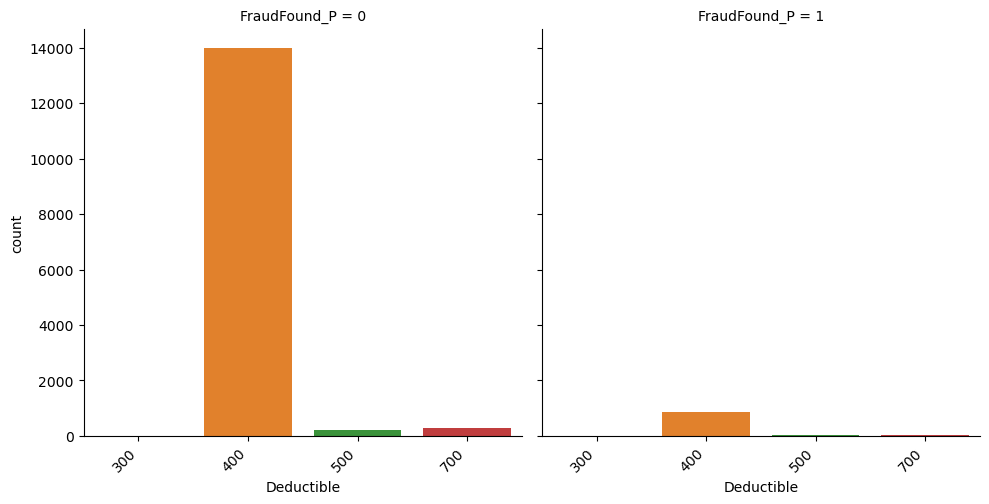

<Figure size 2000x1000 with 0 Axes>

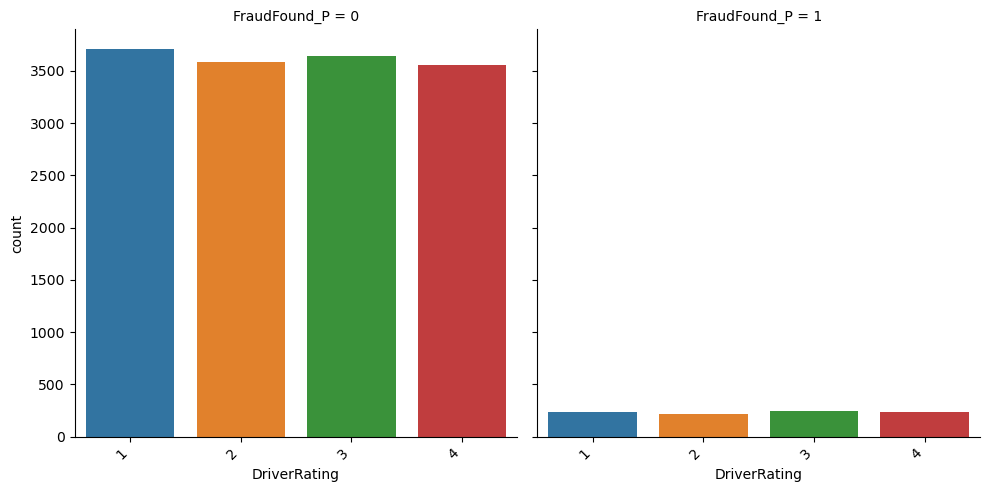

<Figure size 2000x1000 with 0 Axes>

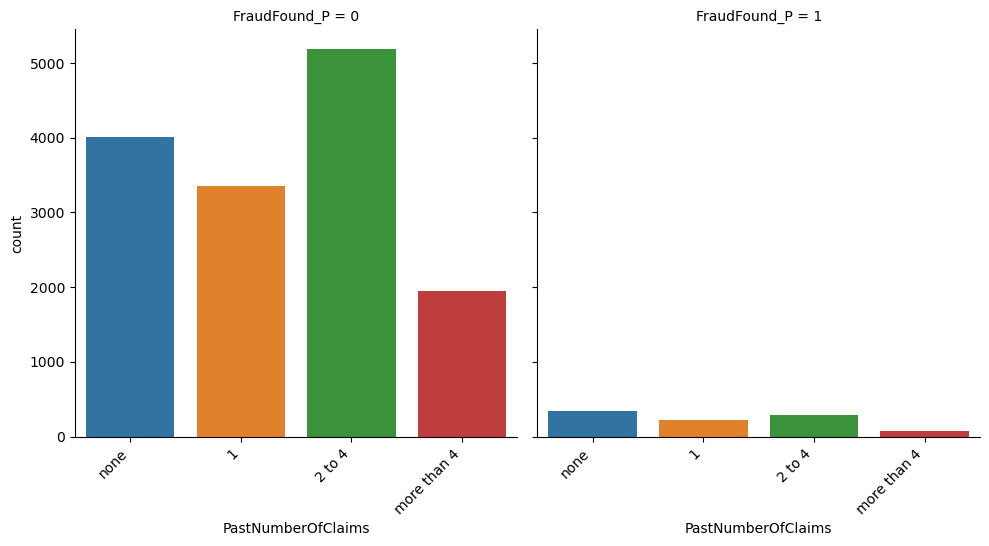

<Figure size 2000x1000 with 0 Axes>

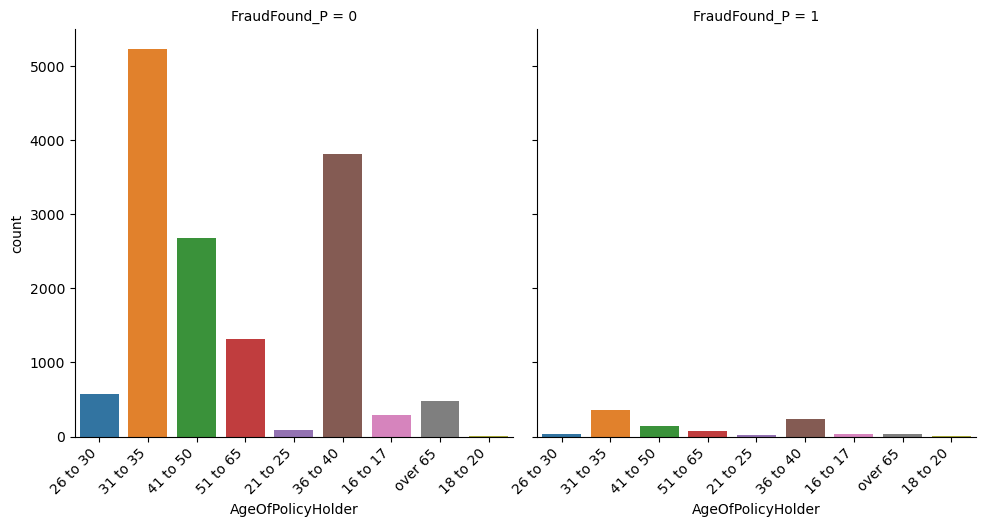

<Figure size 2000x1000 with 0 Axes>

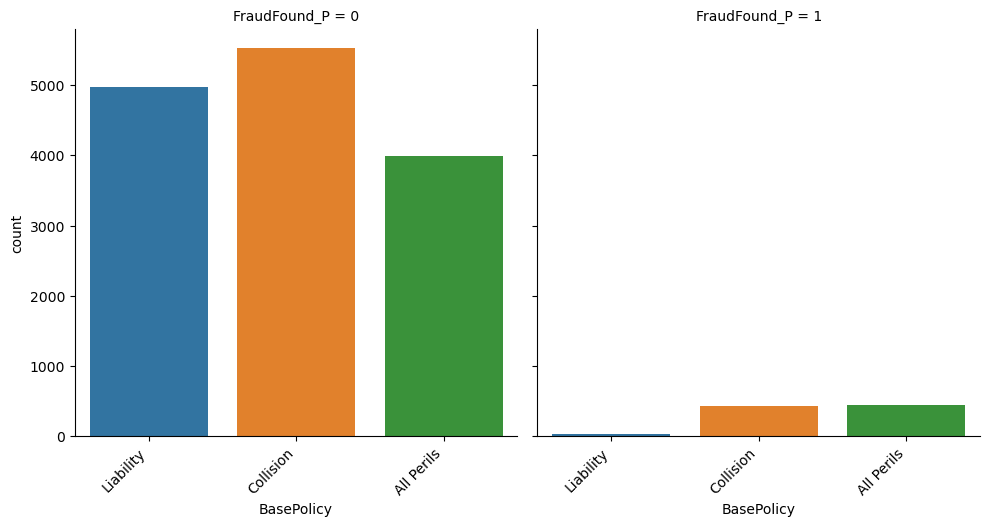

In [25]:
for col in policy_factors_cols[0:-2]:
    plt.figure(figsize=(20,10))
    g = sns.catplot(data=df,x=col,col='FraudFound_P',kind='count')
    g.set_xticklabels(rotation=45,horizontalalignment='right')

In [26]:
t = (df.groupby('RepNumber').count()['PolicyNumber'].sort_values(ascending=False) / len(df['PolicyNumber']))*100
t

RepNumber
7     6.932555
9     6.478599
1     6.400778
5     6.400778
10    6.394293
12    6.335927
15    6.335927
16    6.271077
2     6.199741
3     6.154345
11    6.147860
6     6.108949
14    6.102464
8     6.037613
4     5.914397
13    5.784695
Name: PolicyNumber, dtype: float64

In [27]:
fraud_values = [0,1]

for i in fraud_values:
    t = (df[df['FraudFound_P'] == i].groupby('RepNumber').count()['PolicyNumber'].sort_values(ascending=False) / len(df[df['FraudFound_P'] == i]))*100
    print(i,t)


0 RepNumber
7     6.863489
5     6.449610
9     6.442712
12    6.415120
15    6.401324
1     6.373732
10    6.346141
16    6.304753
2     6.215079
11    6.152997
3     6.132303
14    6.097813
8     6.063323
6     6.042630
4     5.946058
13    5.752914
Name: PolicyNumber, dtype: float64
1 RepNumber
7     8.017335
6     7.150596
10    7.150596
9     7.042254
1     6.825569
3     6.500542
13    6.283857
14    6.175515
11    6.067172
2     5.958830
16    5.742145
5     5.633803
8     5.633803
4     5.417118
15    5.308776
12    5.092091
Name: PolicyNumber, dtype: float64


5.event factors

In [28]:
event_factors_cols

['PoliceReportFiled',
 'WitnessPresent',
 'AgentType',
 'NumberOfSuppliments',
 'AddressChange_Claim',
 'NumberOfCars']

In [29]:
for col in event_factors_cols:
    t = df.groupby(col).count()['PolicyNumber'].sort_values(ascending=False)
    print(t)

PoliceReportFiled
No     14992
Yes      428
Name: PolicyNumber, dtype: int64
WitnessPresent
No     15333
Yes       87
Name: PolicyNumber, dtype: int64
AgentType
External    15179
Internal      241
Name: PolicyNumber, dtype: int64
NumberOfSuppliments
none           7047
more than 5    3867
1 to 2         2489
3 to 5         2017
Name: PolicyNumber, dtype: int64
AddressChange_Claim
no change         14324
4 to 8 years        631
2 to 3 years        291
1 year              170
under 6 months        4
Name: PolicyNumber, dtype: int64
NumberOfCars
1 vehicle      14316
2 vehicles       709
3 to 4           372
5 to 8            21
more than 8        2
Name: PolicyNumber, dtype: int64


In [30]:
for col in df.columns[5:7]:
    t = df.groupby(col).count()['PolicyNumber']
    print(t)

DayOfWeekClaimed
0               1
Friday       2497
Monday       3757
Saturday      127
Sunday         52
Thursday     2660
Tuesday      3375
Wednesday    2951
Name: PolicyNumber, dtype: int64


MonthClaimed
0         1
Apr    1271
Aug    1126
Dec    1146
Feb    1287
Jan    1446
Jul    1225
Jun    1293
Mar    1348
May    1411
Nov    1285
Oct    1339
Sep    1242
Name: PolicyNumber, dtype: int64


In [31]:
df.drop([1516],axis=0,inplace=True)

## Create Model

In [32]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [34]:
df.head(5)

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,...,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy
0,Dec,5,Wednesday,Honda,Urban,Tuesday,Jan,1,Female,Single,...,3 years,26 to 30,No,No,External,none,1 year,3 to 4,1994,Liability
1,Jan,3,Wednesday,Honda,Urban,Monday,Jan,4,Male,Single,...,6 years,31 to 35,Yes,No,External,none,no change,1 vehicle,1994,Collision
2,Oct,5,Friday,Honda,Urban,Thursday,Nov,2,Male,Married,...,7 years,41 to 50,No,No,External,none,no change,1 vehicle,1994,Collision
3,Jun,2,Saturday,Toyota,Rural,Friday,Jul,1,Male,Married,...,more than 7,51 to 65,Yes,No,External,more than 5,no change,1 vehicle,1994,Liability
4,Jan,5,Monday,Honda,Urban,Tuesday,Feb,2,Female,Single,...,5 years,31 to 35,No,No,External,none,no change,1 vehicle,1994,Collision


In [36]:
cols_to_dummy = ['Make','AccidentArea','Sex','MaritalStatus','PolicyType']

In [37]:
for col in cols_to_dummy:
    temp = pd.get_dummies(df[col],drop_first=True)
    df.drop(col,axis=1,inplace=True)
    df = pd.concat([df,temp],axis=1)

In [39]:
le = LabelEncoder()

for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = le.fit_transform(df[col])

In [40]:
df.head(5)

,Month,WeekOfMonth,DayOfWeek,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Age,Fault,VehicleCategory,VehiclePrice,...,Single,Widow,Sedan - Collision,Sedan - Liability,Sport - All Perils,Sport - Collision,Sport - Liability,Utility - All Perils,Utility - Collision,Utility - Liability
0,2,5,6,5,4,1,21,0,1,5,...,1,0,0,0,0,0,1,0,0,0
1,4,3,6,1,4,4,34,0,1,5,...,1,0,0,0,0,1,0,0,0,0
2,10,5,0,4,9,2,47,0,1,5,...,0,0,0,0,0,1,0,0,0,0
3,6,2,2,0,5,1,65,1,1,0,...,0,0,0,1,0,0,0,0,0,0
4,4,5,1,5,3,2,27,1,1,5,...,1,0,0,0,0,1,0,0,0,0


In [41]:
df.drop('PolicyNumber',axis=1,inplace=True)

In [42]:
X = df.drop('FraudFound_P',axis=1)
y = df['FraudFound_P']

In [43]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [44]:
lg_cls = LogisticRegression()
dt_cls = DecisionTreeClassifier()
rf_cls = RandomForestClassifier()
sv_cls = SVC()

In [45]:
classifiers = [lg_cls,dt_cls,rf_cls]

c:\Users\Marcos Verdi\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\Marcos Verdi\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Marcos Verdi\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and 

The train accuracy score for LogisticRegression() is 0.9405755978921767
The test accuracy score for LogisticRegression() is 0.9383916990920882
LogisticRegression()               precision    recall  f1-score   support

           0       0.94      1.00      0.97      2894
           1       0.00      0.00      0.00       190

    accuracy                           0.94      3084
   macro avg       0.47      0.50      0.48      3084
weighted avg       0.88      0.94      0.91      3084

The train accuracy score for DecisionTreeClassifier() is 1.0
The test accuracy score for DecisionTreeClassifier() is 0.8965629053177692
DecisionTreeClassifier()               precision    recall  f1-score   support

           0       0.95      0.94      0.94      2894
           1       0.18      0.19      0.18       190

    accuracy                           0.90      3084
   macro avg       0.56      0.57      0.56      3084
weighted avg       0.90      0.90      0.90      3084

The train accuracy sc

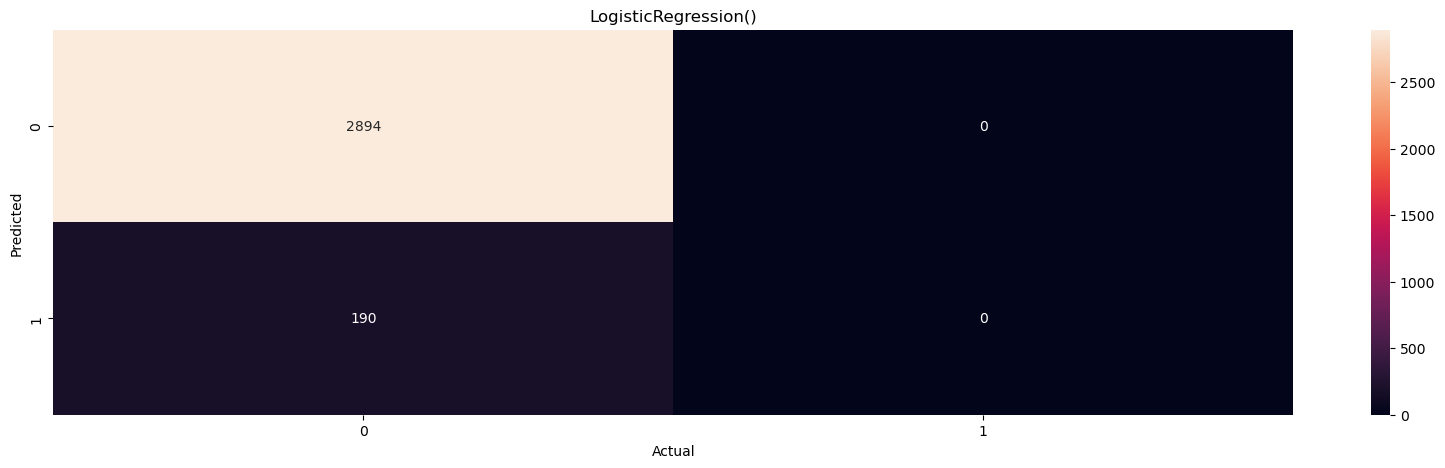

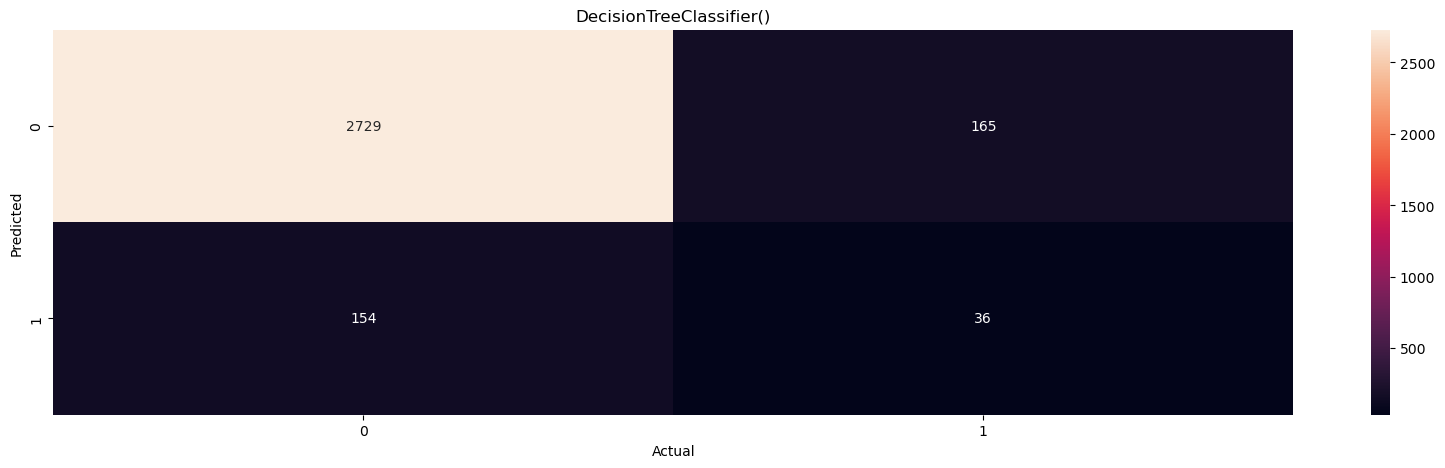

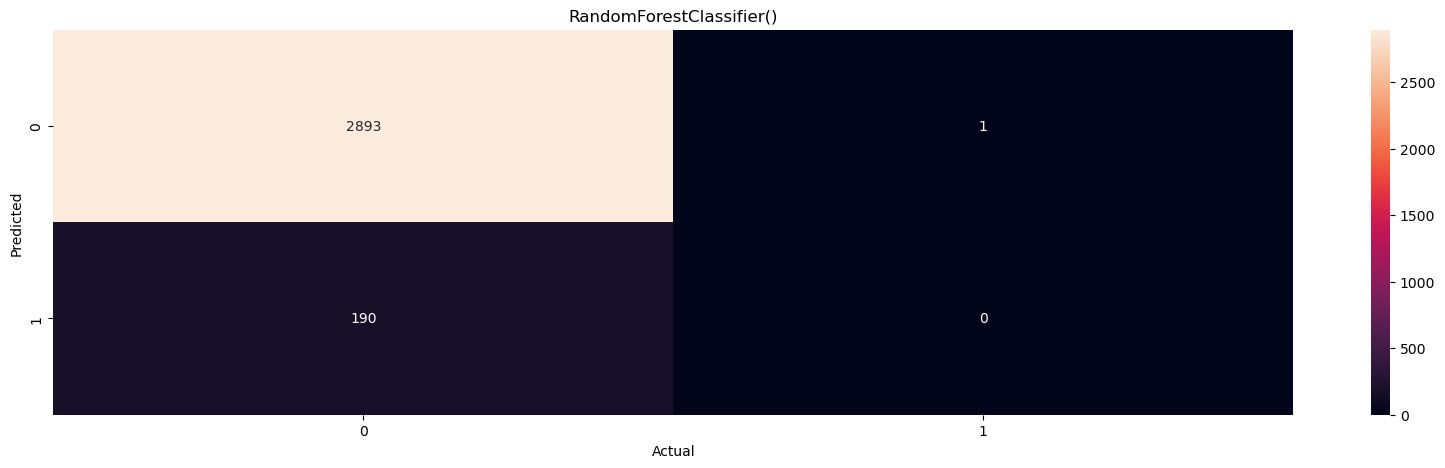

In [54]:
for c in classifiers:
    c.fit(x_train,y_train)
    pred1 = c.predict(x_train)
    pred2 = c.predict(x_test)
    cm = confusion_matrix(y_test,pred2)
    plt.figure(figsize=(20,5))
    sns.heatmap(cm,annot=True,fmt='g')
    plt.xlabel("Actual")
    plt.ylabel("Predicted")
    plt.title(c)
    print("The train accuracy score for",c,"is",accuracy_score(y_train,pred1))
    print("The test accuracy score for",c,"is",accuracy_score(y_test,pred2))
    print(c,classification_report(y_test,pred2))